In [1]:
from matplotlib import pyplot as plt
from matplotlib import cycler
from matplotlib import cm
import os
import pandas as pd
from astropy.io import ascii
import numpy as np

In [8]:
file_name = "11pts.result"
df = ascii.read(file_name)
df

T,mu_up,mu_dn,n_up,n_up_err,n_dn,n_dn_err
float64,float64,float64,float64,float64,float64,float64
0.5,-1.0,-1.0,0.327866819,0.0,0.327866819,0.0
0.5,-0.8,-0.8,0.355521549,0.0,0.355521549,0.0
0.5,-0.6,-0.6,0.386280518,0.0,0.386280518,0.0
0.5,-0.4,-0.4,0.420971574,0.0,0.420971574,0.0
0.5,-0.2,-0.2,0.459357776,0.0,0.459357776,0.0
0.5,0.0,0.0,0.5,0.0,0.5,0.0
0.5,0.2,0.2,0.540642224,0.0,0.540642224,0.0
0.5,0.4,0.4,0.579028426,0.0,0.579028426,0.0
0.5,0.6,0.6,0.613719482,0.0,0.613719482,0.0


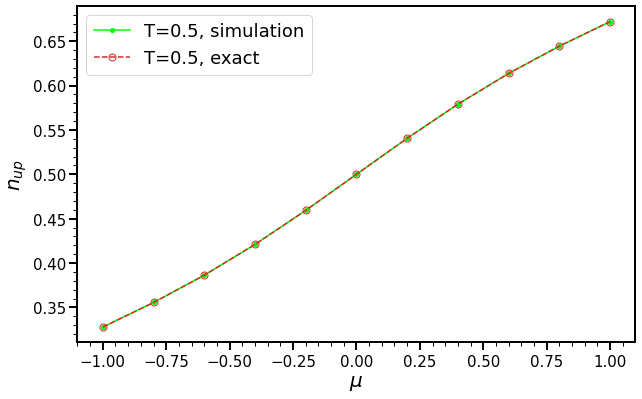

In [9]:
#=========== set up the parameters for the plot ===========#
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle']]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
plt.rcParams['axes.prop_cycle'] = custom_cycler
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['lime','blue','red']
params = {'legend.fontsize': 13,
          'axes.labelsize': 15,
          'axes.titlesize': 20,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'ytick.major.size': 5.5,
          'axes.linewidth': 2}

plt.rcParams.update(params)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
ax = axs

#ax.axvline(x=0.6213, color='gray', linestyle='--')
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel(r'$\mu$', size=20)
ax.set_ylabel(r'$n_{up}$', size=20)
ax.minorticks_on()
ax.tick_params(axis='both', which='major',
               labelsize=15, length=8, width=2)
ax.tick_params(axis='both', which='minor',
               labelsize=12, length=4, width=1)
ax.grid(False)

#============== adding exact solution to it ===============#
def E(kx, ky):
    return -2*(np.cos(np.pi * kx / 2)+np.cos(np.pi * ky / 2))

def n(μ):
    n=0
    for kx in np.linspace(-1,2,num=4):
        for ky in np.linspace(-1,2,num=4):
            n += 1 / (np.exp(2*(E(kx, ky) - μ)) + 1)
    return n/16

n_exact = []
for μ in np.linspace(-1,1,num=11):
    n_exact.append(n(μ))
    
#======================== plotting =========================#
ax.plot(df['mu_up'], df['n_up'], '-o', markersize=4,
        linewidth=1.5,
        color='lime',
        label="T="+str(df['T'][0]) + ", simulation", alpha=1)
ax.plot(df['mu_up'], n_exact, '--o', fillstyle='none', markersize=7,
        linewidth=1.5,
        color='tab:red',
        label="T="+str(df['T'][0])+", exact", alpha=1)
ax.legend(fontsize=18)

#ax.legend(ncol=1, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True)
fig.savefig('test_11pts'+'.png',format='png',dpi=600)

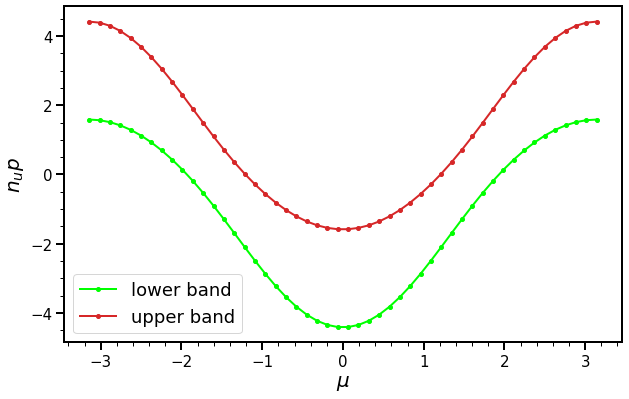

In [5]:
t1=1;t2=2;t3=1
def E_plus(kx):
    return (-(t1+t2)*(np.cos(kx))+np.sqrt(t3**2+(t1-t2)**2 * (np.cos(kx))**2))

def E_minus(kx):
    return (-(t1+t2)*(np.cos(kx))-np.sqrt(t3**2+(t1-t2)**2 * (np.cos(kx))**2))

#=========== set up the parameters for the plot ===========#
params = {'legend.fontsize': 13,
          'axes.labelsize': 15,
          'axes.titlesize': 20,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'ytick.major.size': 5.5,
          'axes.linewidth': 2}

plt.rcParams.update(params)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
ax = axs

#ax.axvline(x=0.6213, color='gray', linestyle='--')
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel(r'$\mu$', size=20)
ax.set_ylabel(r'$n_up$', size=20)
ax.minorticks_on()
ax.tick_params(axis='both', which='major',
               labelsize=15, length=8, width=2)
ax.tick_params(axis='both', which='minor',
               labelsize=12, length=4, width=1)
ax.grid(False)

E_minus_pts = []
E_plus_pts = []
for k in np.linspace(-np.pi,np.pi,num=50):
    E_minus_pts.append(E_minus(k))
    E_plus_pts.append(E_plus(k))
    
ax.plot(np.linspace(-np.pi,np.pi,num=50), E_minus_pts, '-o', markersize=4,
        linewidth=2,
        color='lime',
        label='lower band', alpha=1)
ax.plot(np.linspace(-np.pi,np.pi,num=50), E_plus_pts, '-o', markersize=4,
        linewidth=2,
        color='tab:red',
        label="upper band", alpha=1)
ax.legend(fontsize=18)



## Test plot with interlayer hopping turned on

In [6]:
file_name = "11pts_test_interlayer.result"
df = ascii.read(file_name)
df

T,mu_up,mu_dn,n_up,n_up_err,n_dn,n_dn_err
float64,float64,float64,float64,float64,float64,float64
0.5,-1.0,-1.0,0.380502368,0.0,0.380502368,0.0
0.5,-0.8,-0.8,0.409124737,0.0,0.409124737,0.0
0.5,-0.6,-0.6,0.435389596,0.0,0.435389596,0.0
0.5,-0.4,-0.4,0.458925472,0.0,0.458925472,0.0
0.5,-0.2,-0.2,0.480127388,0.0,0.480127388,0.0
0.5,0.0,0.0,0.5,0.0,0.5,0.0
0.5,0.2,0.2,0.519872612,0.0,0.519872612,0.0
0.5,0.4,0.4,0.541074528,0.0,0.541074528,0.0
0.5,0.6,0.6,0.564610404,0.0,0.564610404,0.0


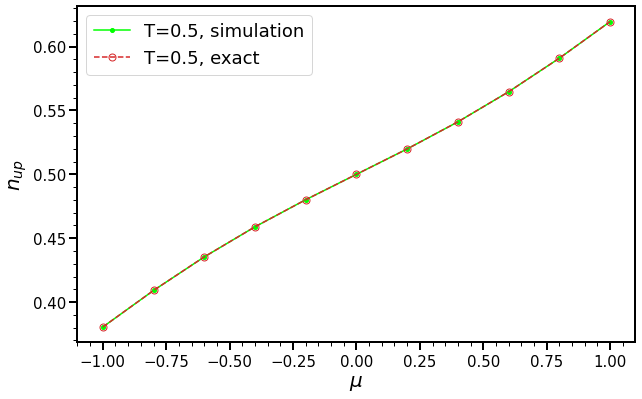

In [46]:
#=========== set up the parameters for the plot ===========#
#colors = ['lime','blue','red']
params = {'legend.fontsize': 13,
          'axes.labelsize': 15,
          'axes.titlesize': 20,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'ytick.major.size': 5.5,
          'axes.linewidth': 2}

plt.rcParams.update(params)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
ax = axs

ax.set_xlabel(r'$\mu$', size=20)
ax.set_ylabel(r'$n_{up}$', size=20)
ax.minorticks_on()
ax.tick_params(axis='both', which='major',
               labelsize=15, length=8, width=2)
ax.tick_params(axis='both', which='minor',
               labelsize=12, length=4, width=1)
ax.grid(False)

#============== adding exact solution to it ===============#
t1=1;t2=2;t3=1
def E_plus(kx, ky):
    return (-(t1+t2)*(np.cos(np.pi * kx / 2)+np.cos(np.pi * ky / 2))+np.sqrt(t3**2+(t1-t2)**2 * (np.cos(np.pi * kx / 2)+np.cos(np.pi * ky / 2))**2))
def E_minus(kx, ky):
    return (-(t1+t2)*(np.cos(np.pi * kx / 2)+np.cos(np.pi * ky / 2))-np.sqrt(t3**2+(t1-t2)**2 * (np.cos(np.pi * kx / 2)+np.cos(np.pi * ky / 2))**2))

def n(μ):
    n=0
    for kx in np.linspace(-1,2,num=4):
        for ky in np.linspace(-1,2,num=4):
            n += 1 / (np.exp(2*(E_plus(kx, ky) - μ)) + 1)
            n += 1 / (np.exp(2*(E_minus(kx, ky) - μ)) + 1)
    return n/32

n_exact = []
for μ in np.linspace(-1,1,num=11):
    n_exact.append(n(μ))
    
#======================== plotting =========================#
ax.plot(df['mu_up'], df['n_up'], '-o', markersize=4,
        linewidth=1.5,
        color='lime',
        label="T="+str(df['T'][0]) + ", simulation", alpha=1)
ax.plot(df['mu_up'], n_exact, '--o', fillstyle='none', markersize=7,
        linewidth=1.5,
        color='tab:red',
        label="T="+str(df['T'][0])+", exact", alpha=1)
ax.legend(fontsize=18)

#ax.legend(ncol=1, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True)
fig.savefig('test_11pts_interlayer'+'.png',format='png',dpi=600)

## Test plot with interaction turned on with only 1 site each layer

In [3]:
file_name = "11pts_interaction_2sites.result"
df = ascii.read(file_name)
df

T,mu_up,mu_dn,n_up,n_up_err,n_dn,n_dn_err
float64,float64,float64,float64,float64,float64,float64
0.5,-1.0,-1.0,0.365049854,0.00197544206,0.365457157,0.00216552527
0.5,-0.8,-0.8,0.398005835,0.00140435413,0.398423075,0.00168318068
0.5,-0.6,-0.6,0.426269413,0.00179507228,0.428948725,0.00162398848
0.5,-0.4,-0.4,0.455776284,0.00177446543,0.452597992,0.00155140053
0.5,-0.2,-0.2,0.477748298,0.00181090498,0.477877205,0.00196129062
0.5,0.0,0.0,0.498172949,0.00122925783,0.501827051,0.00122925783
0.5,0.2,0.2,0.522122795,0.00196129062,0.522251702,0.00181090498
0.5,0.4,0.4,0.547402008,0.00155140053,0.544223716,0.00177446543
0.5,0.6,0.6,0.571051275,0.00162398848,0.573730587,0.00179507228


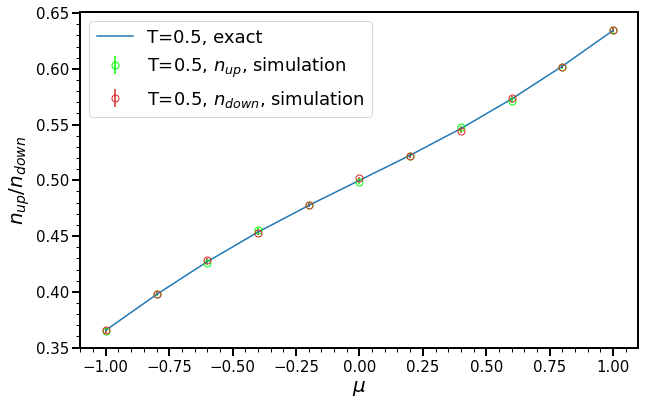

In [7]:
#=========== set up the parameters for the plot ===========#
#colors = ['lime','blue','red']
params = {'legend.fontsize': 13,
          'axes.labelsize': 15,
          'axes.titlesize': 20,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'ytick.major.size': 5.5,
          'axes.linewidth': 2}

plt.rcParams.update(params)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
ax = axs

ax.set_xlabel(r'$\mu$', size=20)
ax.set_ylabel(r'$n_{up}$/$n_{down}$', size=20)
ax.minorticks_on()
ax.tick_params(axis='both', which='major',
               labelsize=15, length=8, width=2)
ax.tick_params(axis='both', which='minor',
               labelsize=12, length=4, width=1)
ax.grid(False)

#======================== exact result ===============#
n_exact = [0.36557206799498393, 0.3976087280914191, 0.4270607296627359, 0.4535573283276612, 0.47750827408579877, 0.5, 0.5224917259142006, 0.5464426716723388, 0.572939270337264, 0.6023912719085812, 0.6344279320050161]
#======================== plotting =========================#
ax.errorbar(df['mu_up'], df['n_up'], yerr=1*df['n_up_err'], linestyle='none',fillstyle='none',
    marker = 'o',
    markersize=7,
    linewidth=1.5,
    color='lime',
    label="T="+str(df['T'][0]) + r", $n_{up}$, simulation", alpha=1)
ax.errorbar(df['mu_dn'], df['n_dn'], yerr=1*df['n_dn_err'], linestyle='none',fillstyle='none',
    marker = 'o',
    markersize=7,
    linewidth=1.5,
    color='tab:red',
    label="T="+str(df['T'][0]) + r", $n_{down}$, simulation", alpha=1)
ax.plot(df['mu_up'], n_exact, '-', markersize=4,
        linewidth=1.5,
        color='tab:blue',
        label="T="+str(df['T'][0])+", exact", alpha=1)
ax.legend(fontsize=18)

fig.savefig('test_2sites'+'.png',format='png',dpi=600)